In [1]:
import os
import gzip
import pickle
import numpy as np
from skimage.feature import hog
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier

### MNIST Dataset


In [2]:
# image size and the number of training and testing samples
image_size = 28
num_train = 50000
num_test = 10000

In [3]:
# Read the training data
f = gzip.open(os.path.join('data', 'train-images-idx3-ubyte.gz'),'r')
f.read(16)
buf = f.read(image_size * image_size * num_train)
train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
train_data = train_data.reshape(num_train, image_size, image_size)
f.close()

In [4]:
# Read the testing data
f = gzip.open(os.path.join('data', 't10k-images-idx3-ubyte.gz'),'r')
f.read(16)
buf = f.read(image_size * image_size * num_test)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(num_test, image_size, image_size)
f.close()

In [5]:
# Read the training labels
f = gzip.open(os.path.join('data', 'train-labels-idx1-ubyte.gz'),'r')
f.read(8)
buf = f.read(num_train)
train_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
train_labels = train_labels.reshape(num_train, )
f.close()

In [6]:
# Read the test labels
f = gzip.open(os.path.join('data', 't10k-labels-idx1-ubyte.gz'),'r')
f.read(8)
buf = f.read(num_test)
test_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
test_labels = test_labels.reshape(num_test,)
f.close()

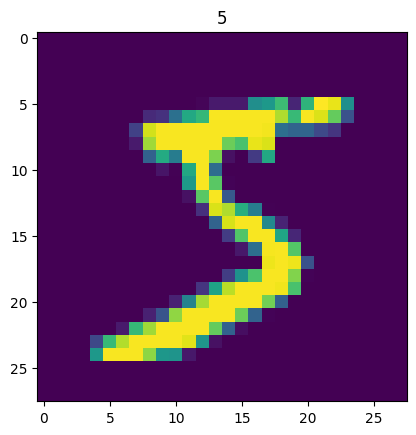

In [7]:
# Display the first sample from the training data
image = np.asarray(train_data[0]).squeeze()
plt.imshow(image)
plt.title(train_labels[0])
plt.show()

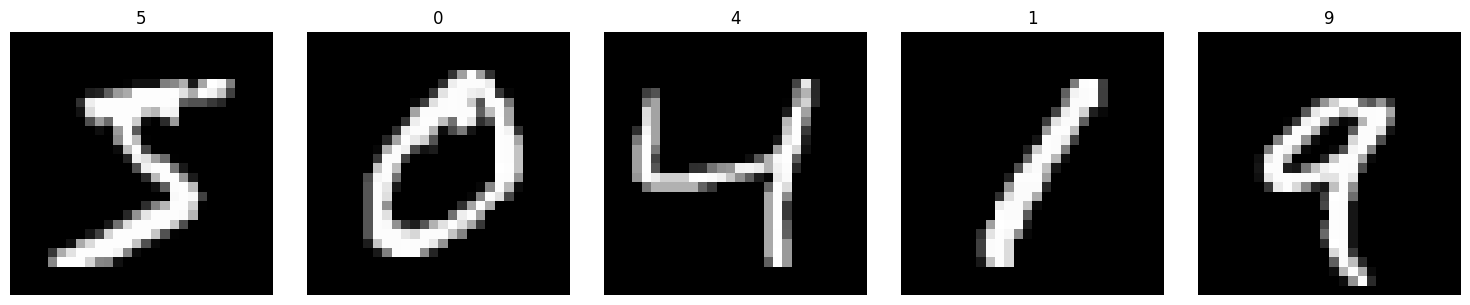

In [8]:
# Display the first 5 samples from the training data
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    image = np.asarray(train_data[i]).squeeze()
    axes[i].imshow(image, cmap='gray')  # Mostrar en escala de grises
    axes[i].set_title(train_labels[i])
    axes[i].axis('off')  # Apagar los ejes

plt.tight_layout()
plt.show()

In [9]:
# Extract HOG features 
def extract_HOG_features(data):
    num_samples = data.shape[0]
    hog_features = []
    for i in range(num_samples):
        img = data[i]
        feature = hog(img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(3, 3))
        hog_features.append(feature)
    return np.array(hog_features)

In [11]:
train_features = extract_HOG_features(train_data)
test_features = extract_HOG_features(test_data)
test_features[0].shape

(2025,)

In [13]:
test_features.shape

(10000, 2025)

In [12]:
clf = MLPClassifier(
    solver='adam',
    activation='relu',
    alpha=0.0001,
    hidden_layer_sizes=(256, 128),
    random_state=42,
    max_iter=300,
    learning_rate='adaptive',  # Ajuste de learning_rate
    batch_size=128,             # Ajuste de batch_size
    momentum=0.9,               # Ajuste de momentum
    early_stopping=True,        # Activar early stopping
    validation_fraction=0.1,    # Fracción de datos de validación
    n_iter_no_change=10         # Número de épocas sin mejora antes de parar
)


In [13]:
clf.fit(train_features, train_labels)

MLPClassifier(batch_size=128, early_stopping=True,
              hidden_layer_sizes=(256, 128), learning_rate='adaptive',
              max_iter=300, random_state=42)

In [14]:
pred = clf.predict(train_features)
train_accuracy = np.mean(pred == train_labels)

In [15]:
pred = clf.predict(test_features)
test_accuracy = np.mean(pred == test_labels)

In [16]:
print("Training accuracy: {}".format(train_accuracy))
print("Testing accuracy: {}".format(test_accuracy))

Training accuracy: 0.99762
Testing accuracy: 0.9853


In [17]:
num_wrong_cls = np.sum(pred != test_labels)
print("Number of images incorrectly classified: {}".format(num_wrong_cls))

Number of images incorrectly classified: 147


In [18]:
# Save the weights file to disc
pickle.dump(clf, open("modelo_hog_proyectoFinal.sav", 'wb'))

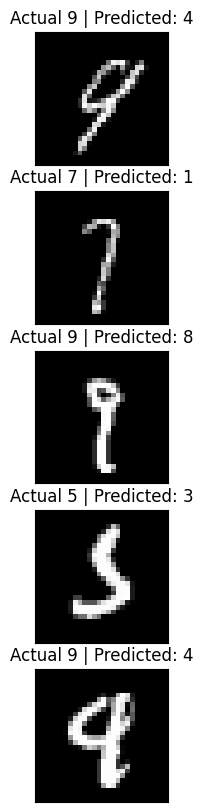

In [19]:
incorrect_pred = pred != test_labels
incorrect_idx = np.where(incorrect_pred == True)
top_five = incorrect_idx[0][:5]

plt.figure(figsize = (10, 10))
for i, idx in enumerate(top_five):
    plt.subplot(5,1,i + 1),plt.imshow(test_data[idx],cmap = 'gray')
    plt.title('Actual {} | Predicted: {}'.format(test_labels[idx], pred[idx])), plt.xticks([]), plt.yticks([])
plt.show()

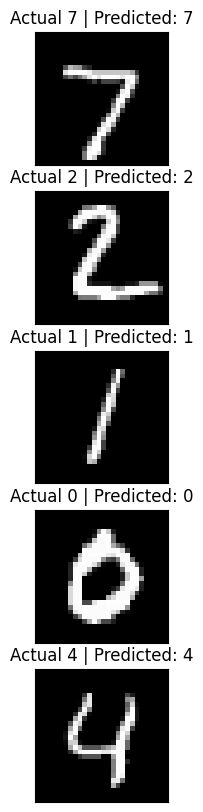

In [20]:
correct_pred = pred == test_labels
correct_idx = np.where(correct_pred == True)
top_five_correct = correct_idx[0][:5]

plt.figure(figsize=(10, 10))
for i, idx in enumerate(top_five_correct):
    plt.subplot(5, 1, i + 1)
    plt.imshow(test_data[idx], cmap='gray')
    plt.title('Actual {} | Predicted: {}'.format(test_labels[idx], pred[idx]))
    plt.xticks([]), plt.yticks([])
plt.show()
